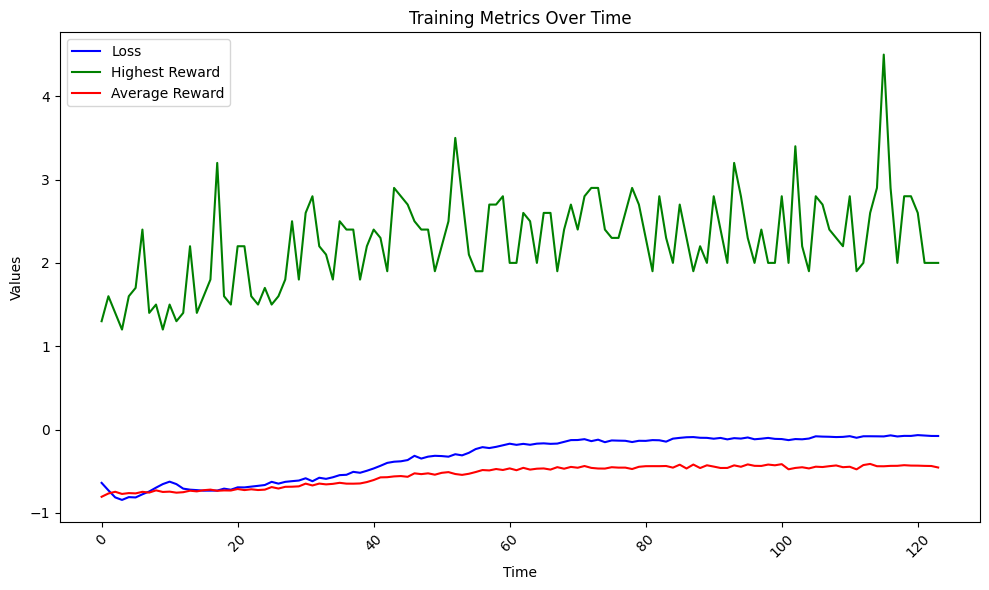

In [12]:
# Re-importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file that the user has uploaded
file_path = 'train_log.csv'

# Read the data from the CSV file
df = pd.read_csv(file_path)

# Convert the 'time' column to a datetime object for better plotting


# Plot the data
plt.figure(figsize=(10, 6))

# Plot loss, highest_reward, and average_reward over time
plt.plot(df['time'], df['loss'], label='Loss', color='blue')
plt.plot(df['time'], df['highest_reward'], label='Highest Reward', color='green')
plt.plot(df['time'], df['average_reward'], label='Average Reward', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Training Metrics Over Time')

# Rotate the time labels for better readability
plt.xticks(rotation=45)

# Adding a legend to differentiate between the lines
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


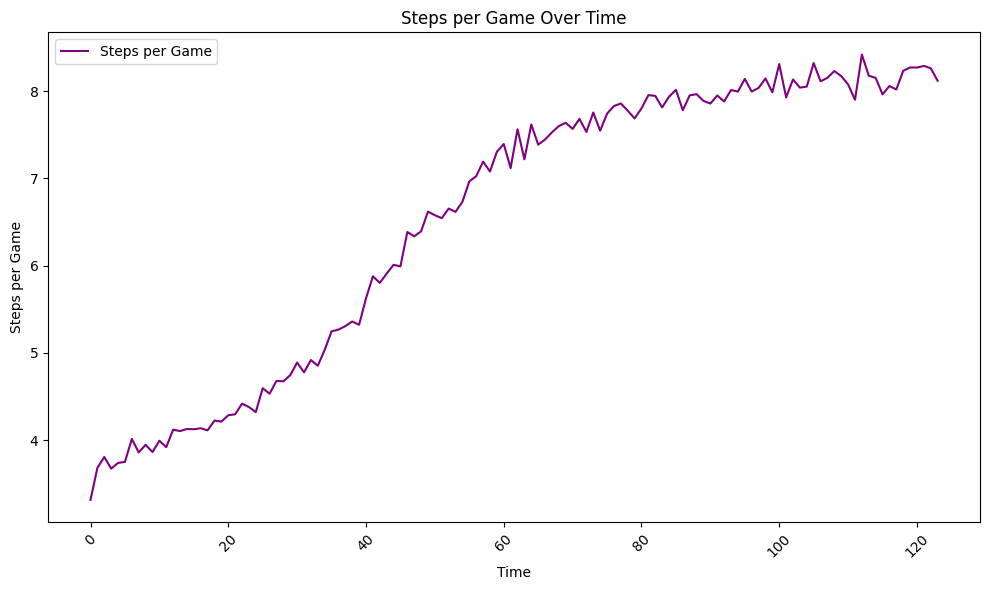

In [13]:
plt.figure(figsize=(10, 6))

# Plotting steps per games over time
plt.plot(df['time'], df['steps'] / df['games'], label='Steps per Game', color='purple')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Steps per Game')
plt.title('Steps per Game Over Time')

# Rotate the time labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()